# Ignoring warnings using warning module

In [1]:
import warnings as warn
warn.filterwarnings('ignore')

# Installing Ultralytics library 

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.5/719.5 kB 22.0 MB/s eta 0:00:00


# Installing YoloV8

In [3]:
from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


# Downloading dataset 

In [6]:
!pip install gdown

In [7]:
import gdown
url = "https://drive.google.com/file/d/1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm/view?usp=sharing"
file_id = url.split("/")[-2]
print(file_id)
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix+file_id, "sign_data.zip")

1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm


Downloading...
From: https://drive.google.com/uc?/export=download&id=1CWSwE0hQOl05c1B9f2SM4j5cjohxZ6Fm
To: /kaggle/working/sign_data.zip
100%|██████████| 10.3M/10.3M [00:00<00:00, 37.9MB/s]


'sign_data.zip'

In [9]:
!unzip sign_data.zip

Archive:  sign_data.zip
  inflating: data.yaml               
   creating: test/images/
  inflating: test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6 - Copy.jpg  
  inflating: test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8c5b98c8-a6d1-11ec-a905-84a93ea18ae6.jpg  
  inflating: test/images/Hello.8d922278-a6d1-11ec-9c17-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.01279dee-a6d2-11ec-a775-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.0391a1b8-a6d2-11ec-9246-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6 - Copy.jpg  
  inflating: test/images/IloveYou.04c7764c-a6d2-11ec-998a-84a93ea18ae6.jpg  
  inflating: test/images/IloveYou.05fc3c80-a6d2-11ec-ba0a-84a93ea18ae6.jpg  
  inflating: test/images/No.b81769f8-a6d1-11ec-8d33-84a93ea18ae6.jpg  
  inflating: test/images/No.b94ba4ee-a6d1-11ec-b2ba-84a93ea18ae6.jpg  
 

# Getting started with model training

In [10]:
!yolo task=detect mode=train model=yolov8n.pt data='/kaggle/working/data.yaml' epochs=100 imgsz=640

100%|███████████████████████████████████████| 6.23M/6.23M [00:00<00:00, 130MB/s]
Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sa

# Visualizing the confusion matrix to check model performance

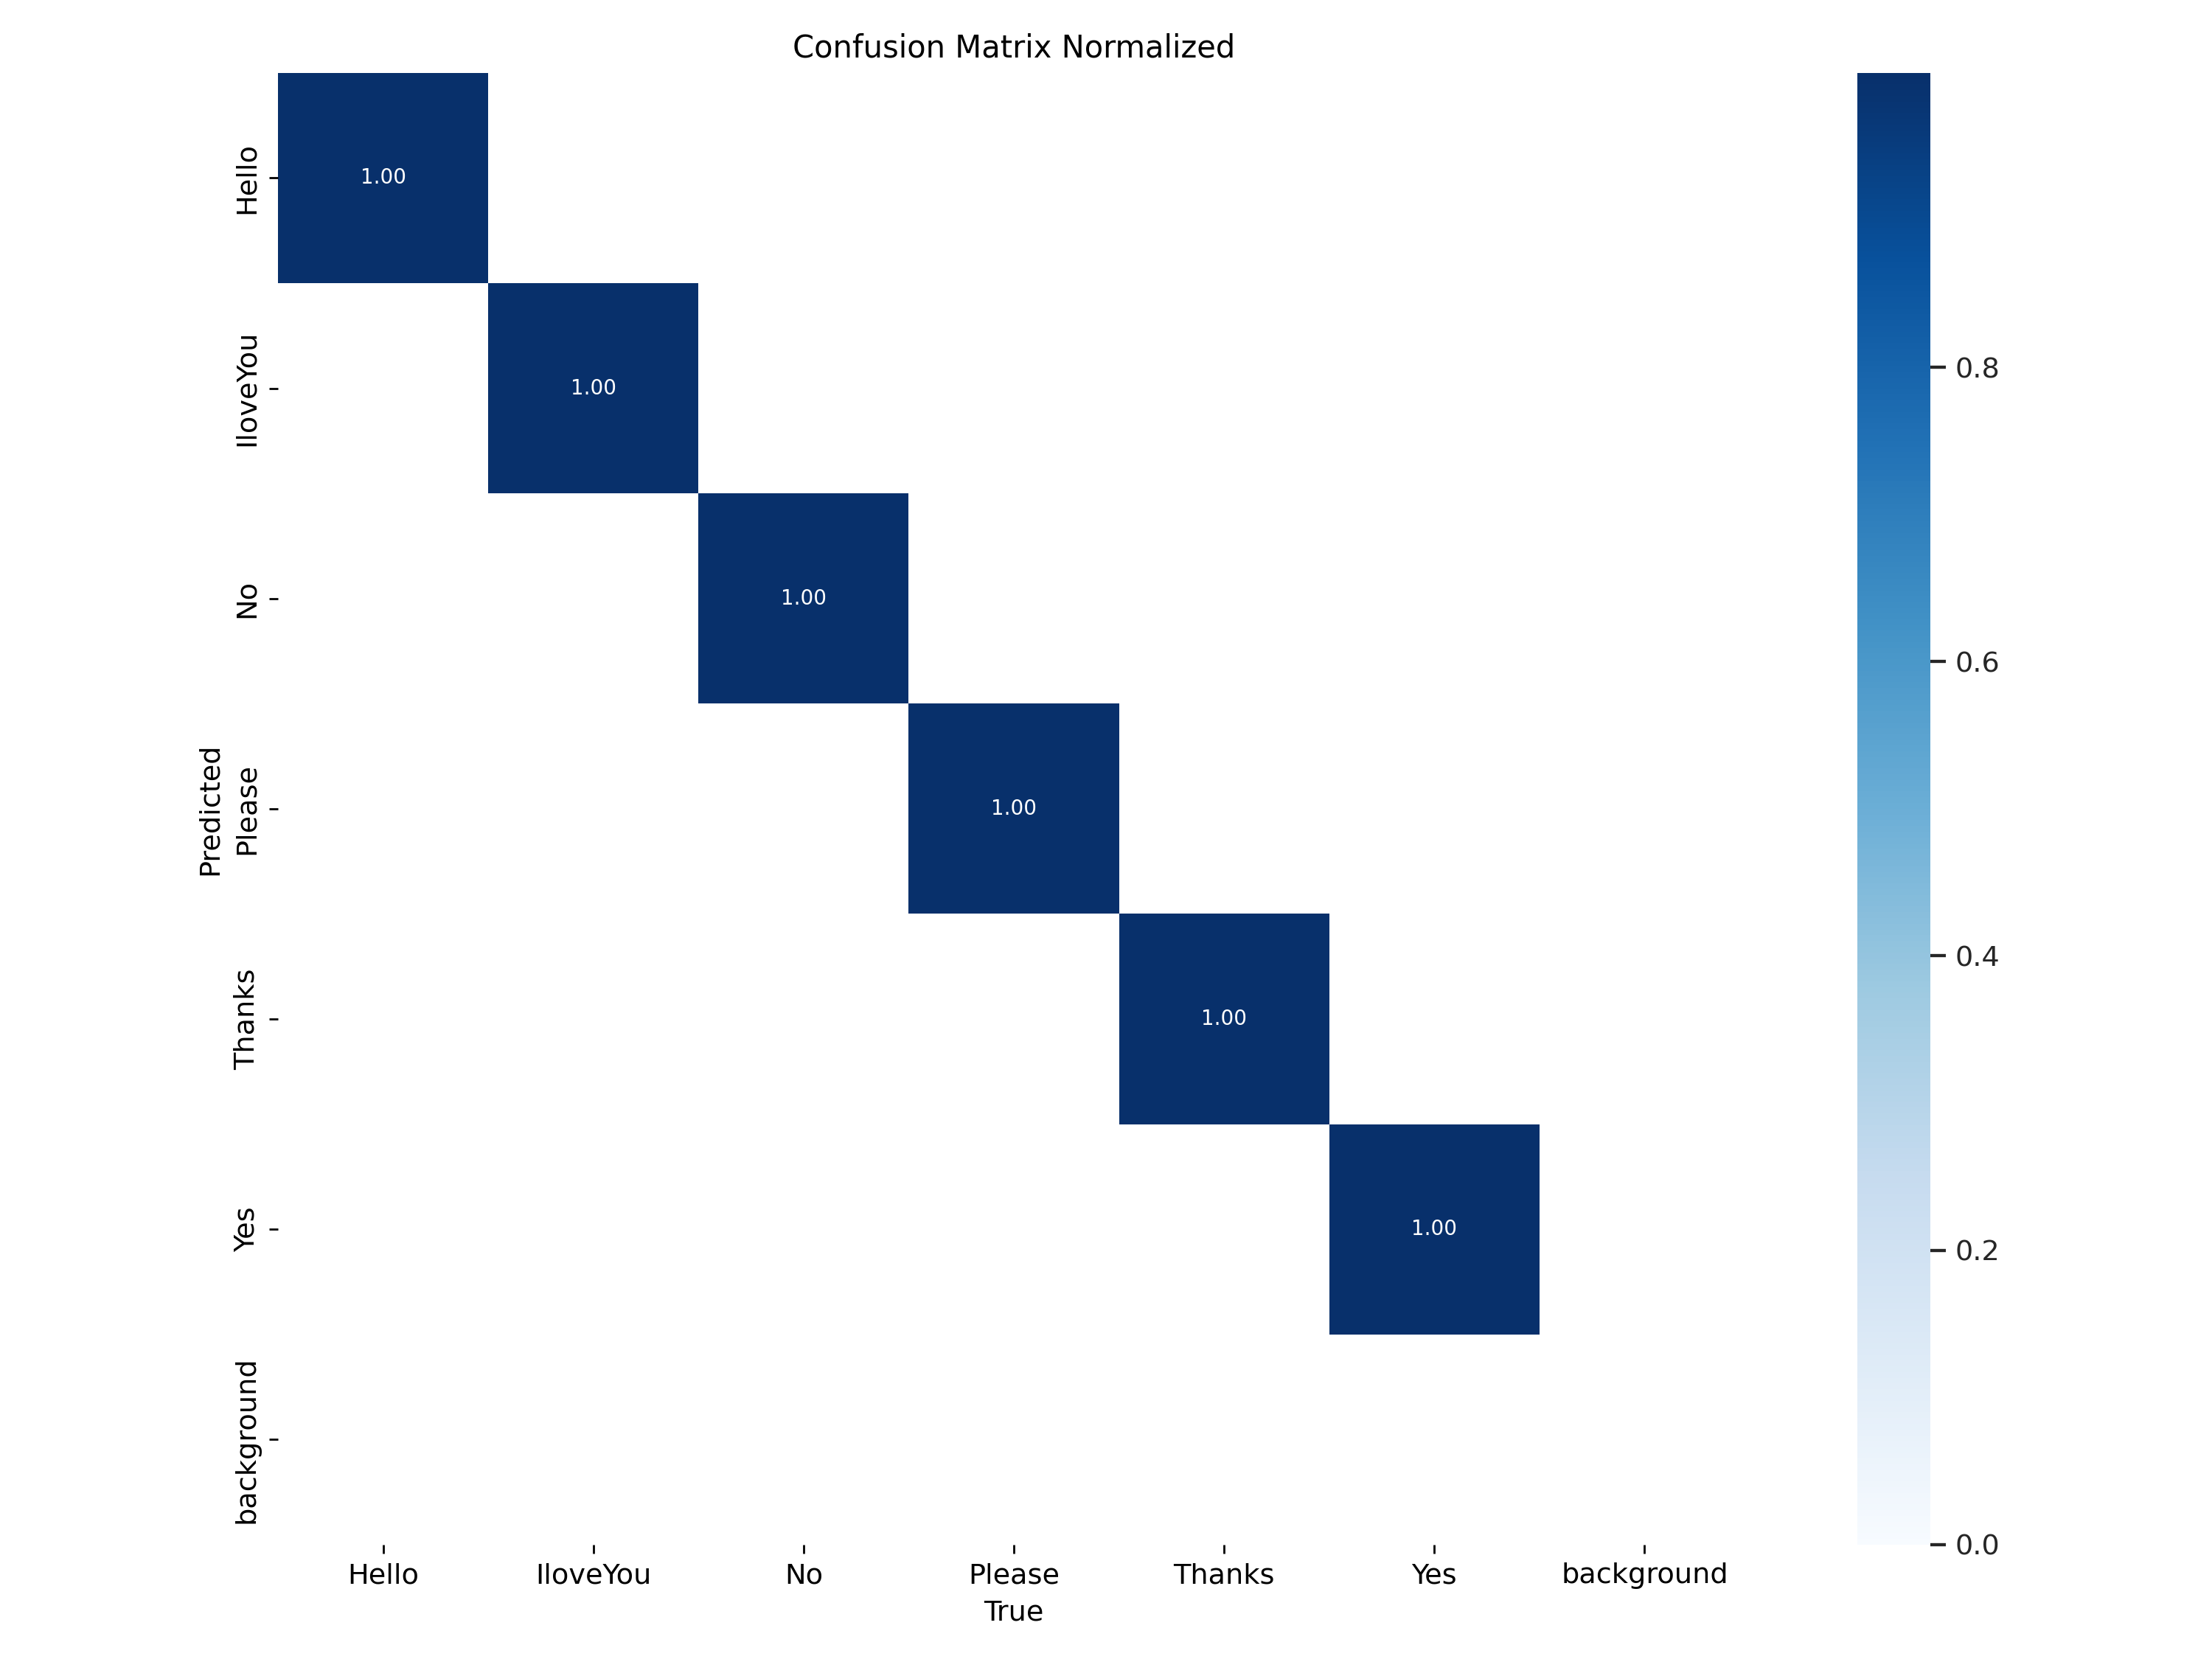

In [11]:
Image(filename=f'/kaggle/working/runs/detect/train/confusion_matrix_normalized.png', width=600)

# Visualizing the results of model training

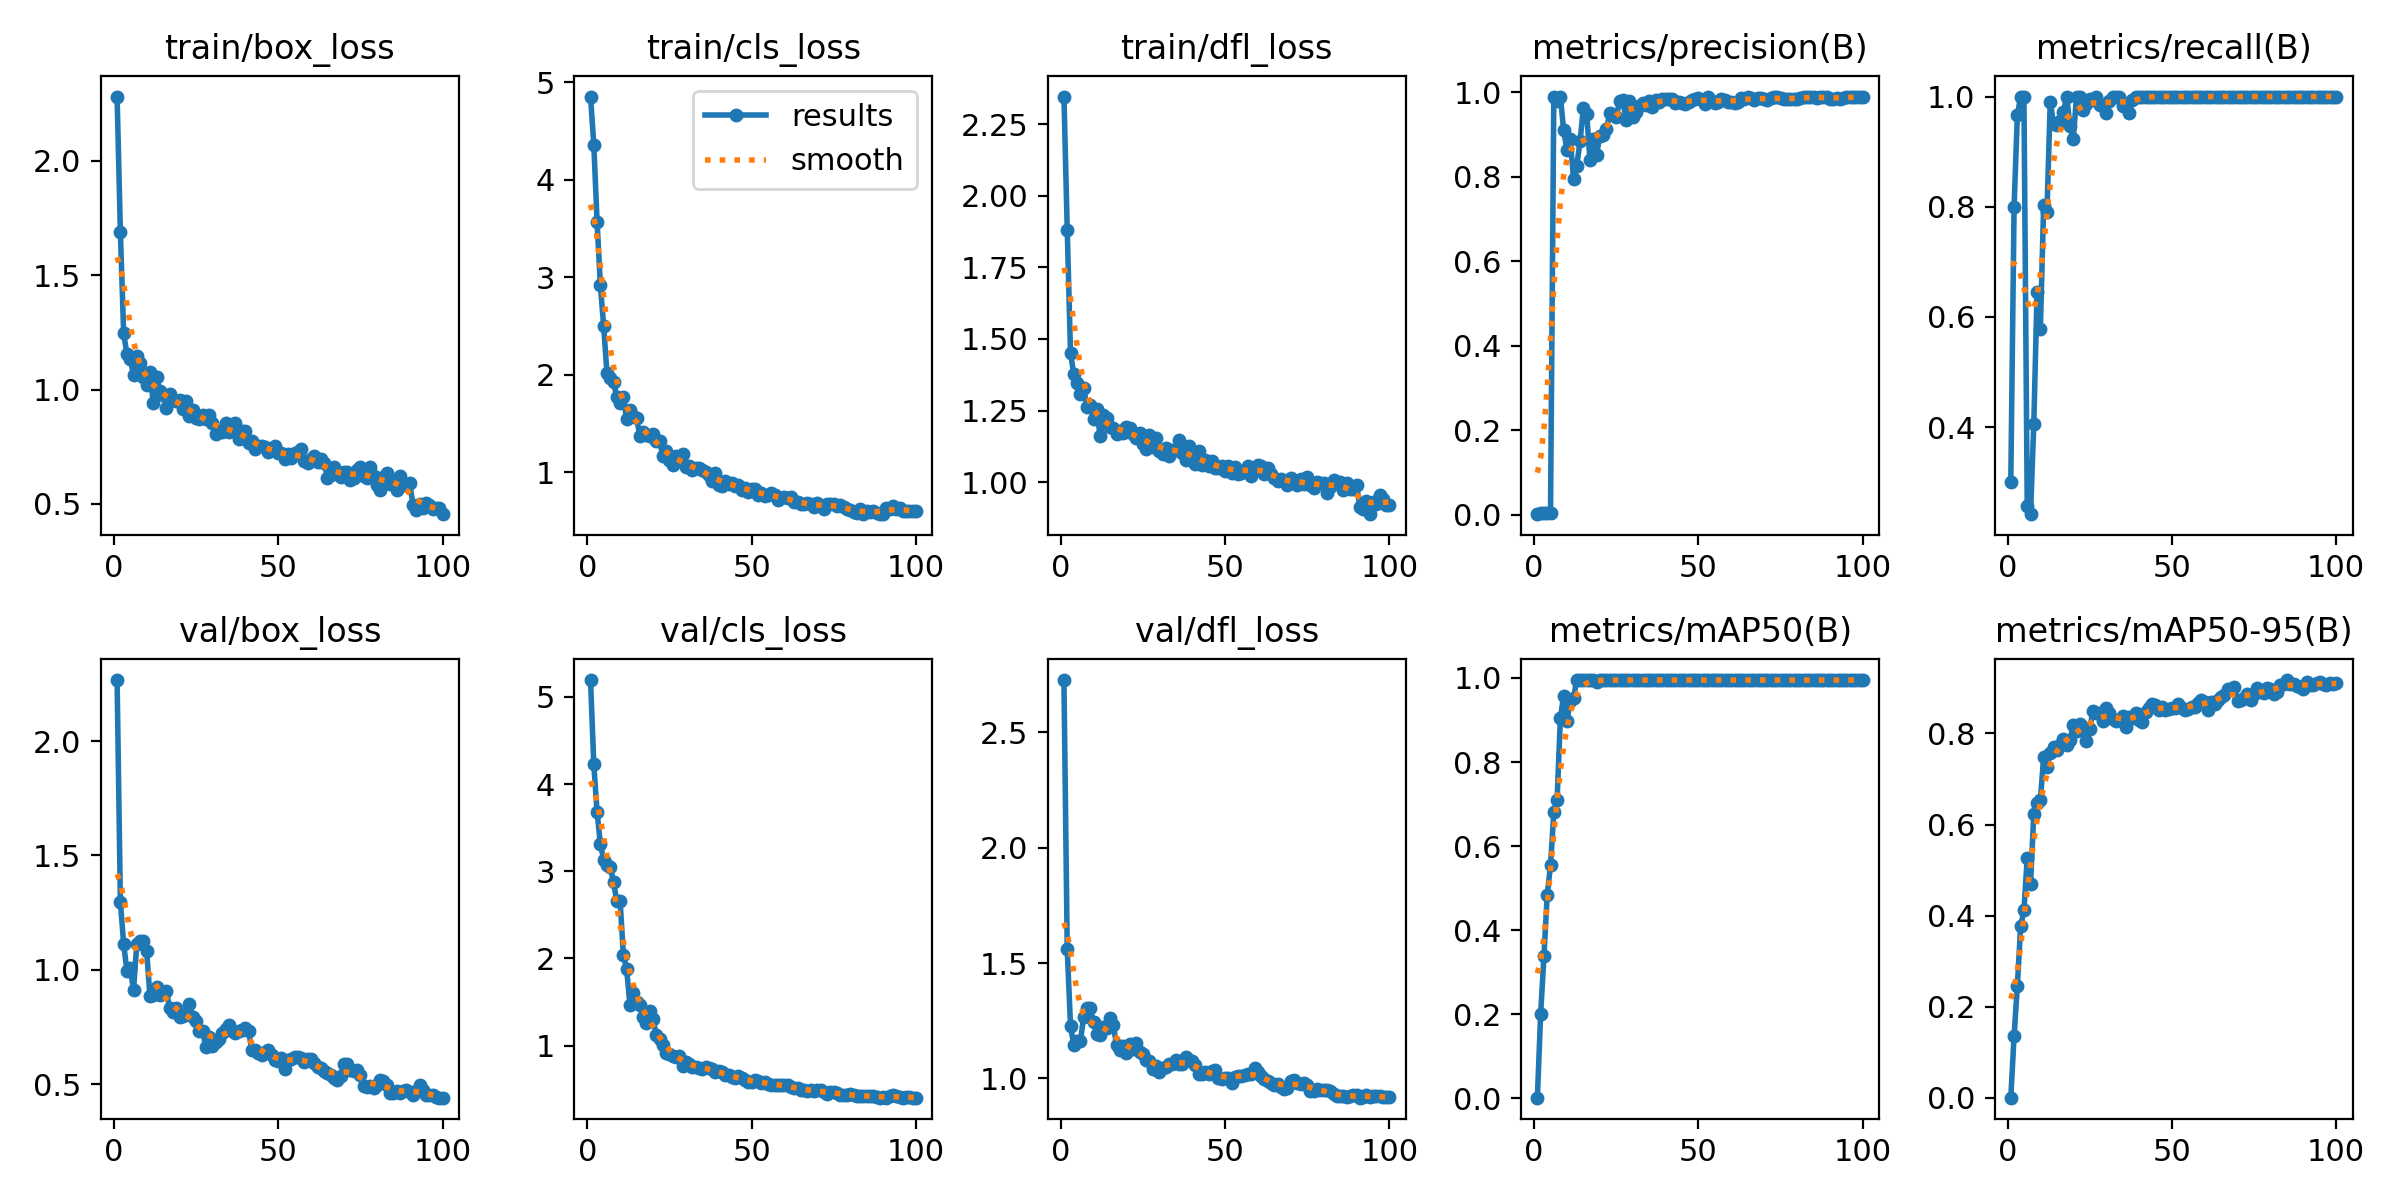

In [12]:
Image(filename=f'/kaggle/working/runs/detect/train/results.png', width=600)

# Getting started with model validation

In [14]:
!yolo task=detect mode=val model='/kaggle/working/runs/detect/train/weights/best.pt' data='/kaggle/working/data.yaml'

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/test/labels.cache... 30 images, 0 backgrounds, 0 c
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         30         30      0.987          1      0.995      0.911
                 Hello         30          5      0.982          1      0.995      0.928
              IloveYou         30          5      0.985          1      0.995      0.911
                    No         30          5      0.986          1      0.995      0.943
                Please         30          5          1          1      0.995      0.876
                Thanks         30          5      0.988          1      0.995      0.882
                   Yes         30          5      0.984          1      0.995      0.927
Speed: 2.3ms preprocess, 23.2ms inference, 

# viewing validation results

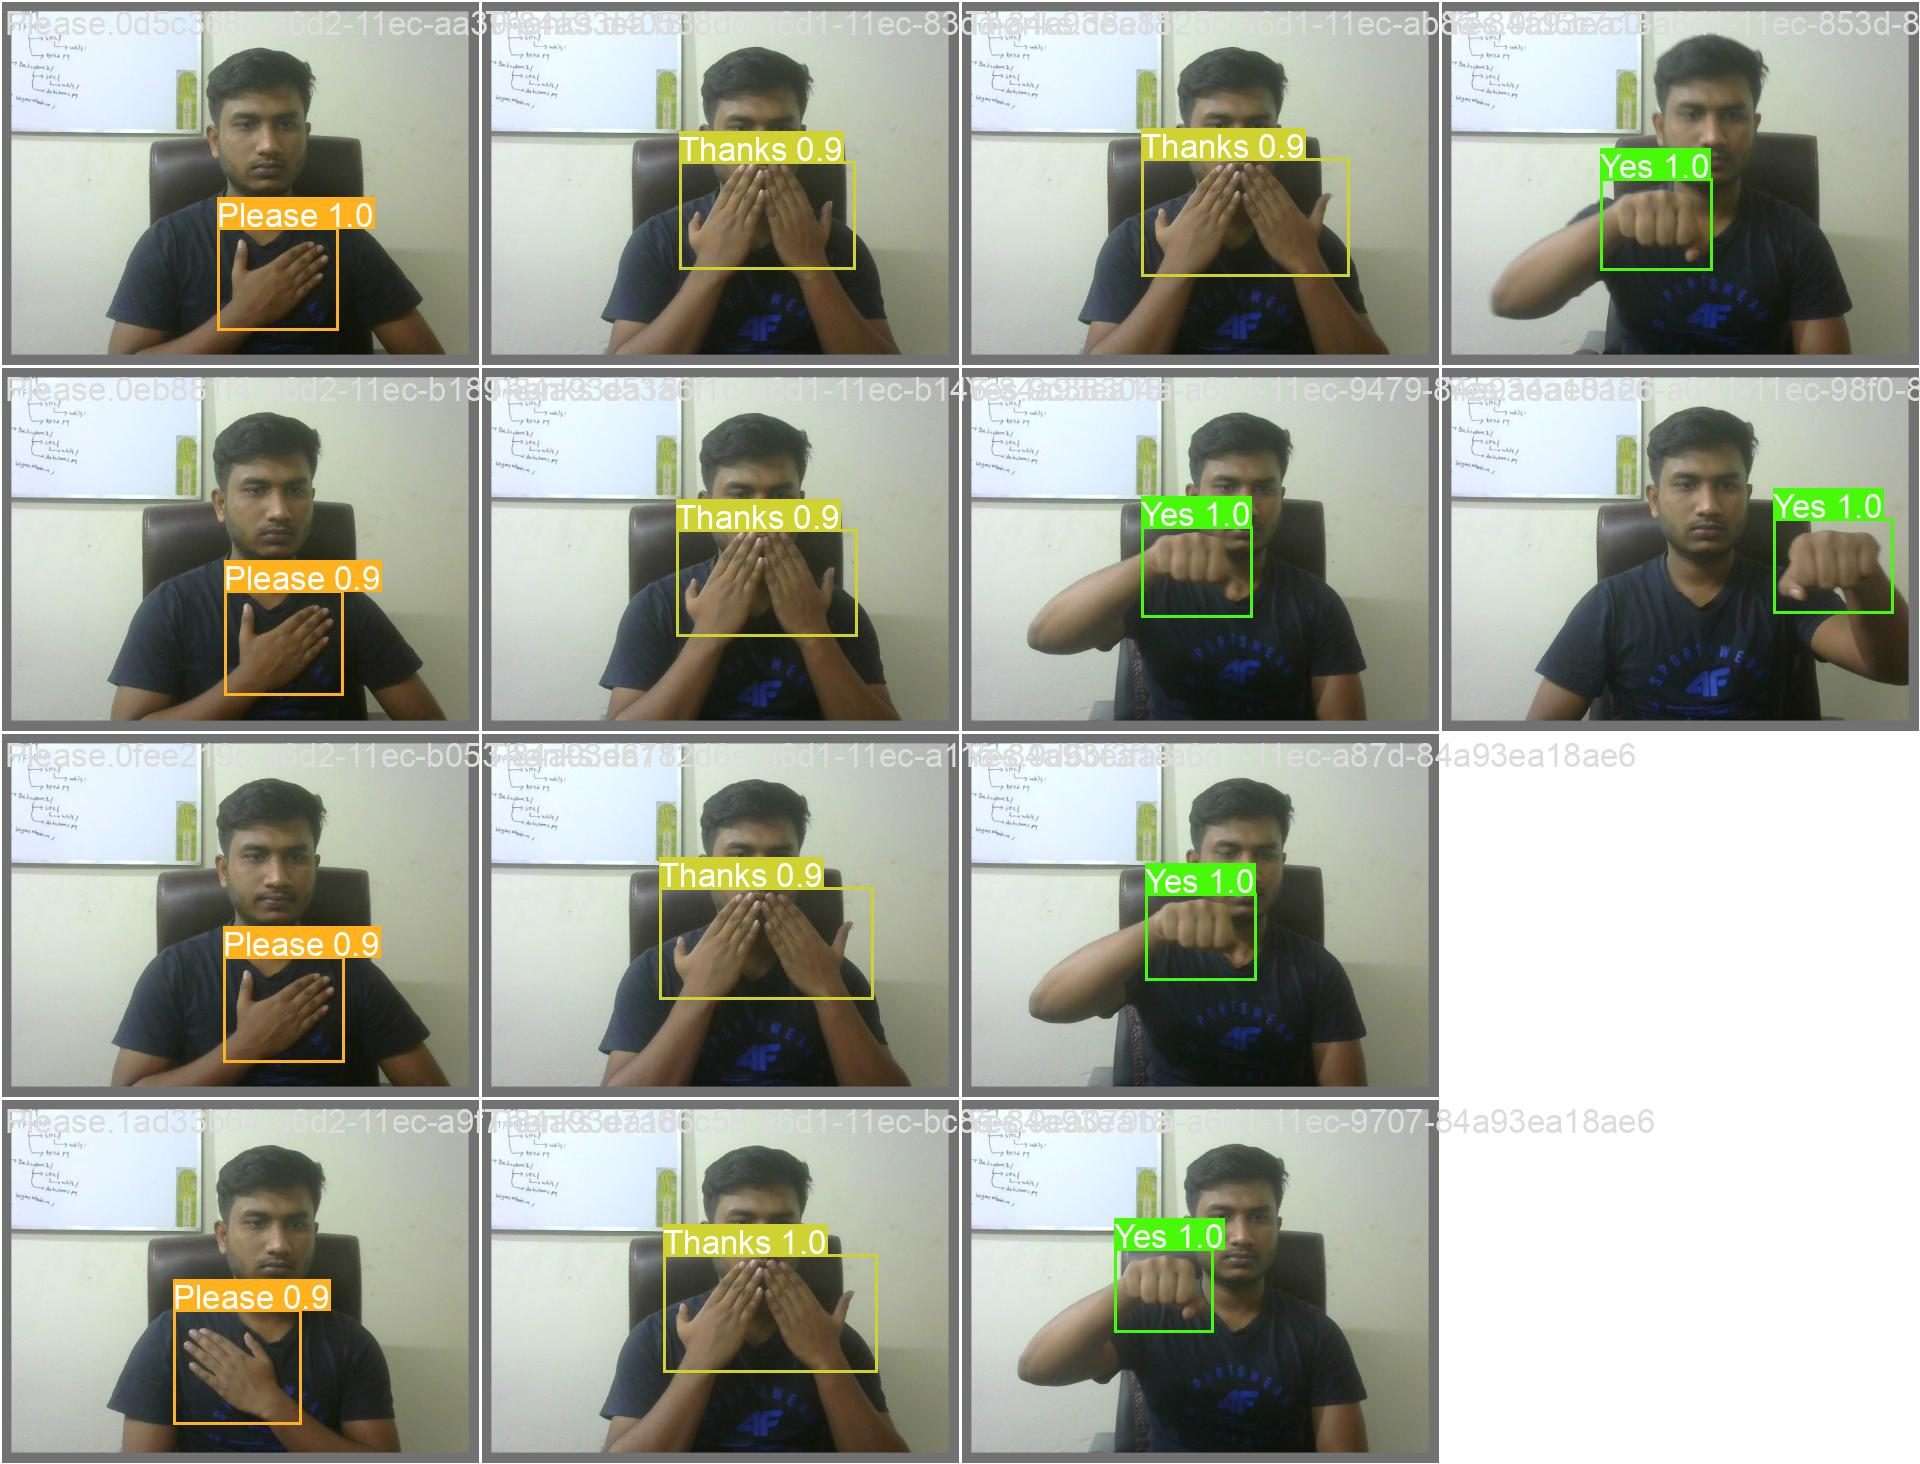

In [16]:
Image(filename=f'/kaggle/working/runs/detect/val2/val_batch1_pred.jpg', width=600)

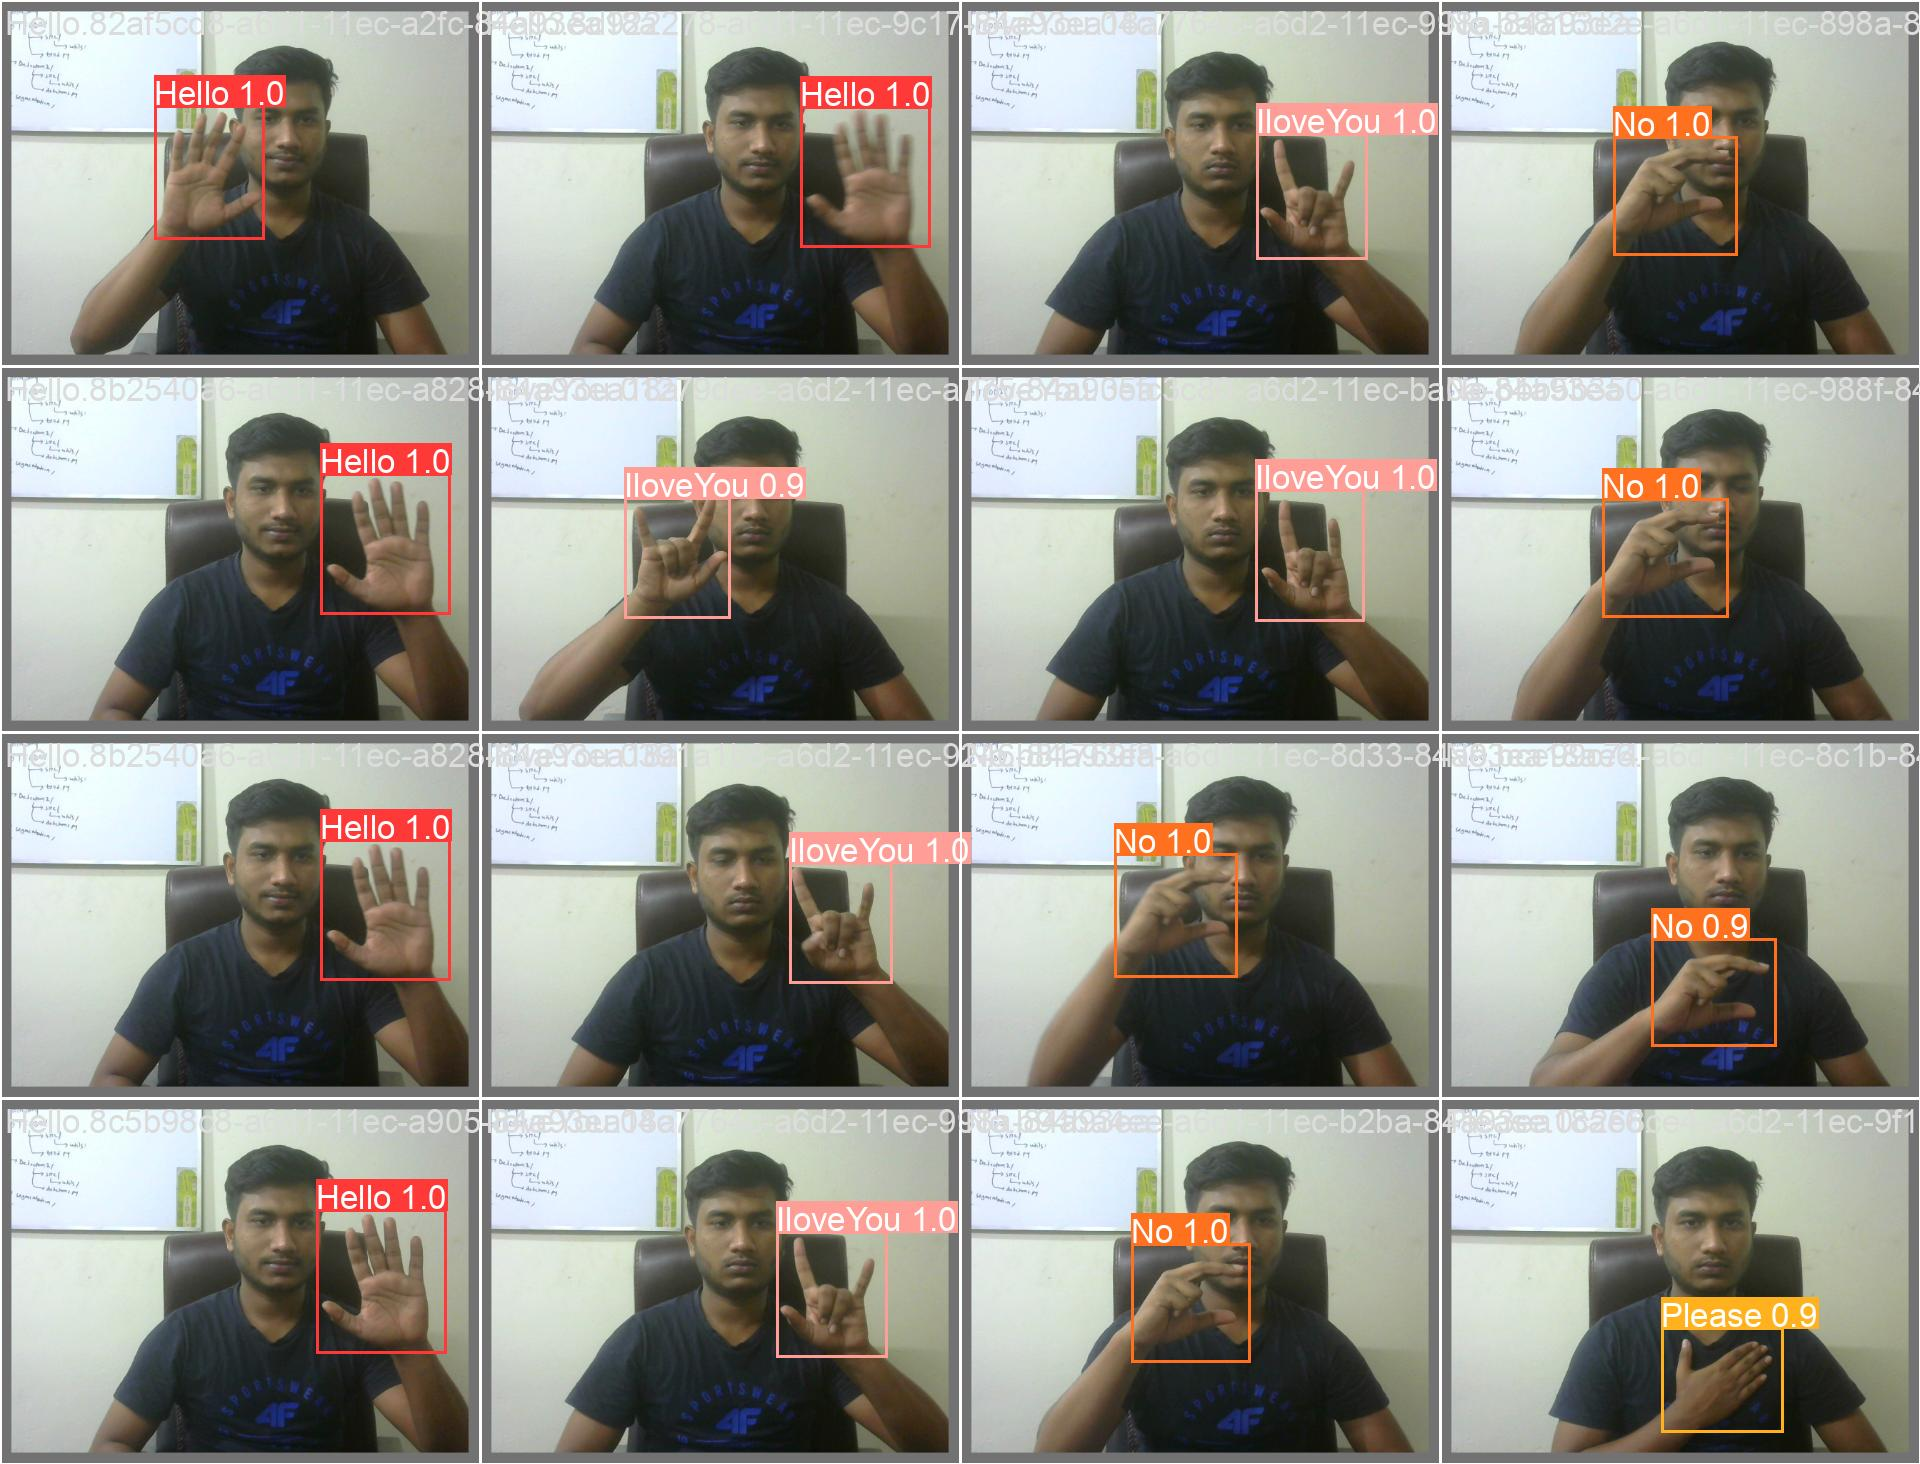

In [20]:
Image(filename=f'/kaggle/working/runs/detect/val2/val_batch0_pred.jpg', width=600)

# Getting started with model prediction 

In [21]:
!yolo task=detect mode=predict model='/kaggle/working/runs/detect/train/weights/best.pt' conf=0.5 source='/kaggle/working/test/images' save_txt=true save_conf=true

Ultralytics YOLOv8.1.24 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/30 /kaggle/working/test/images/Hello.82af5cd8-a6d1-11ec-a2fc-84a93ea18ae6.jpg: 480x640 1 Hello, 55.5ms
image 2/30 /kaggle/working/test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6 - Copy.jpg: 480x640 1 Hello, 6.5ms
image 3/30 /kaggle/working/test/images/Hello.8b2540a6-a6d1-11ec-a828-84a93ea18ae6.jpg: 480x640 1 Hello, 6.3ms
image 4/30 /kaggle/working/test/images/Hello.8c5b98c8-a6d1-11ec-a905-84a93ea18ae6.jpg: 480x640 1 Hello, 5.9ms
image 5/30 /kaggle/working/test/images/Hello.8d922278-a6d1-11ec-9c17-84a93ea18ae6.jpg: 480x640 1 Hello, 6.1ms
image 6/30 /kaggle/working/test/images/IloveYou.01279dee-a6d2-11ec-a775-84a93ea18ae6.jpg: 480x640 1 IloveYou, 5.8ms
image 7/30 /kaggle/working/test/images/IloveYou.0391a1b8-a6d2-11ec-9246-84a93ea18ae6.jpg: 480x640 1 IloveYou, 5.8ms
image 8/30 /kaggle/working/test/image

# Viewing the test results

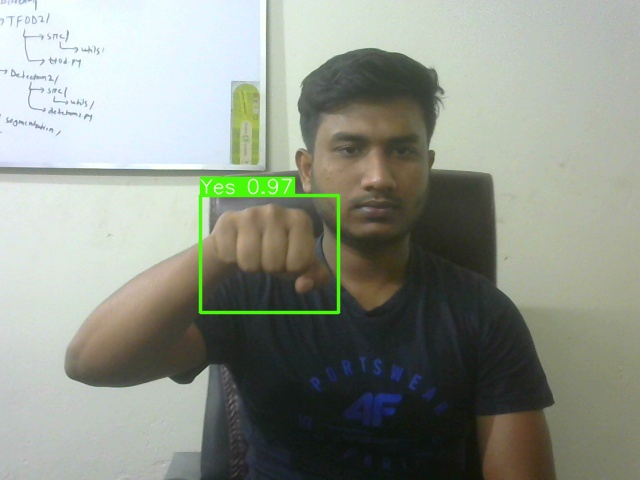

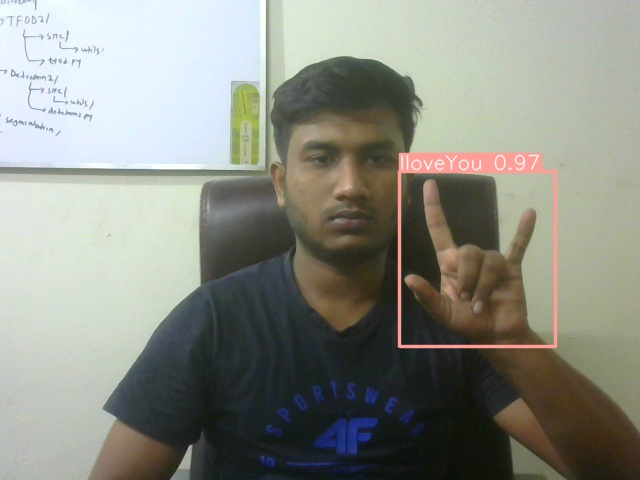

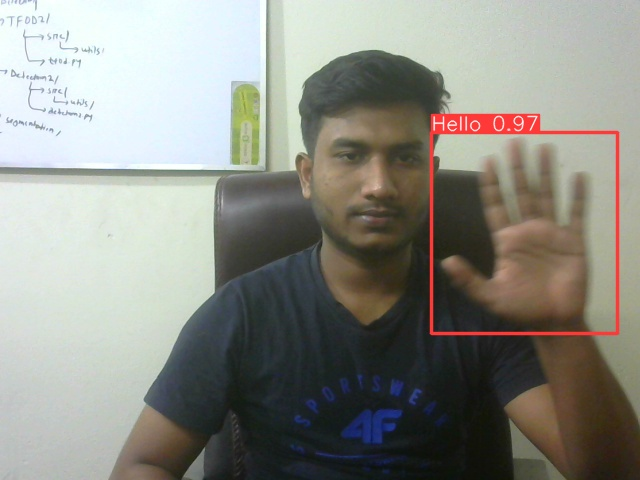

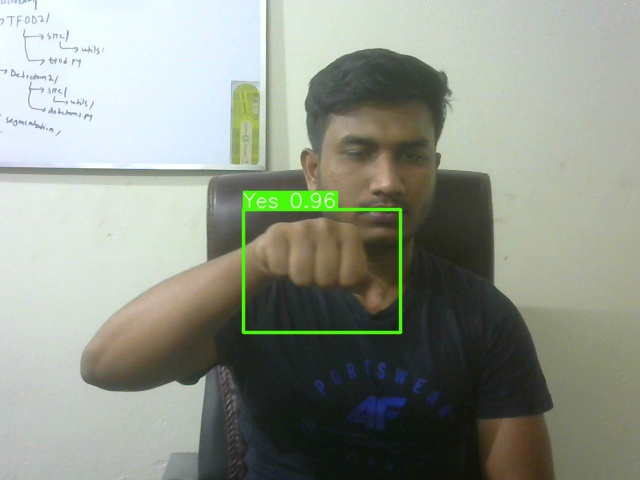

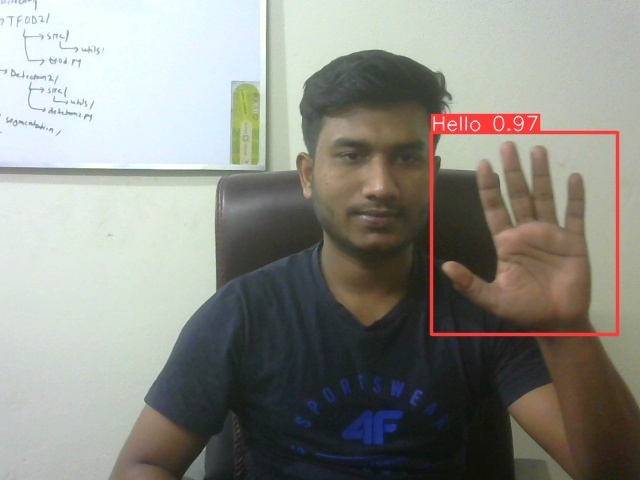

In [22]:
import glob
for image_path in glob.glob(f'/kaggle/working/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path, height=600))
    print("\n")

In [1]:

from IPython import display
display.clear_output()
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.24 🚀 Python-3.11.8 torch-2.2.1+cu121 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
Setup complete ✅ (4 CPUs, 7.4 GB RAM, 264.7/467.9 GB disk)


In [2]:
!yolo task=detect mode=predict model='/home/user/Documents/NULL_CLASS_INTERNSHIP/SignLanguageDetectionProject-NullClassInternshipTask/best.pt' conf=0.5 source='/home/user/Documents/NULL_CLASS_INTERNSHIP/SignLanguageDetectionProject-NullClassInternshipTask/trash/Data/test/images/No.ba816d2e-a6d1-11ec-898a-84a93ea18ae6.jpg' save_txt=true save_conf=true

Ultralytics YOLOv8.1.24 🚀 Python-3.11.8 torch-2.2.1+cu121 CPU (AMD Ryzen 3 3250U with Radeon Graphics)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /home/user/Documents/NULL_CLASS_INTERNSHIP/SignLanguageDetectionProject-NullClassInternshipTask/trash/Data/test/images/No.ba816d2e-a6d1-11ec-898a-84a93ea18ae6.jpg: 480x640 1 No, 372.2ms
Speed: 7.3ms preprocess, 372.2ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels
💡 Learn more at https://docs.ultralytics.com/modes/predict
